# Fracture- and Damagemechanics
# Excercise 6 - Finite Fracture Mechanics

In [1]:
# import packages

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from matplotlib import pyplot as plt
import ipywidgets as widgets
from IPython.display import display

## Excercise 6.1 - Notch

We consider an infinite half plane with an edge. The material is loaded in tension.
The material properties are 

* Gc     = 0.394 mJ/mm^2 => 394 J/m^2

* sigmac = 124 MPa 

for a given external load, the stress distribution in the crack face and the averaged energy is plotted in the following figure.

$\sigma_\text{nenn}  = A r^{\lambda-1} $

$ \mathcal{G}_\text{inc} = \frac{1}{\Delta a} \int_a^{a+\Delta a} \mathcal{G}(\tilde{a}) d\tilde{a}= \frac{1}{\Delta a} \int_a^{a+\Delta a} \frac{K_I(\tilde{a})^2}{E} d\tilde{a}  = \frac{\Pi (a) - \Pi (a+\Delta a)}{b \Delta a} \leftrightarrow \frac{1}{\Delta a} \int_a^{a + \Delta a} K_I^2(\tilde{a}) d\tilde{a} = K_{Ic}^2 $

In [ ]:
A = 5 # Geometry Factor
lamb = 0.3
x = np.linspace(0.001, 5, 500)     # mm
da = x
sigma_x = A * x**(lamb-1)        # MPa
sigma_infty = 10  # MPa
E = 4000  # MPa
y1_lim = 250  # MPa
y2_lim = 2  # mJ/mm^2

K_c = lambda a, sigma_infty: A * sigma_infty * a**(1-lamb)



def FFM_widget(sigma_infty_val=10, sigma_c_val=124, G_c_val=0.394):
    sigma_infty = sigma_infty_val  # MPa
    sigma_c = sigma_c_val  # MPa
    G_c = G_c_val  # N/mm

    # Stress Criterion
    sigma_x = A * sigma_infty_val / x**(1-lamb) # This needs to be updated with the accurate formula

    # Energy Criterion
    G_inc = []
    for d in da:
        G_inc.append(quad(K_c, 0, d, args=(sigma_infty,))[0]**2 /E)
    G_inc = np.array(G_inc)
    
    # Create plots
    fig, ax1 = plt.subplots(figsize=(10, 5))
    ax2 = ax1.twinx()

    # Insert data
    sigma, = ax1.plot(x, sigma_x, color='tab:blue', linewidth=2, label=r'$\sigma(x)$')
    sigma_y = ax1.axhline(y=sigma_c, color='tab:blue', linestyle='--', label=r'$\sigma_y$')
    G_inc_line, = ax2.plot(da, G_inc, color='tab:orange', label=r'$\mathcal{G}_\text{inc}$')
    G_c_line = ax2.axhline(y=G_c, color='tab:orange', linestyle='--', label=r'$\mathcal{G}_c$')

    #boundary
    x_max = 0
    for i in range(len(x)):
        if sigma_x[i] > sigma_c:
            x_max = x[i]
        else:
            break

    da_min = 0
    for i in range(len(da)):
        if G_inc[i] > G_c:
            da_min = da[i]
            break

    # Fill area where both criteria are met
    ax1.fill_betweenx(
        y=np.linspace(0, y1_lim, 100),
        x1=0,
        x2=x_max,
        color='tab:blue',
        alpha=0.3
    )

    ax2.fill_betweenx(
        y=np.linspace(0, y2_lim, 100),
        x1=da_min,
        x2=max(da),
        color='tab:orange',
        alpha=0.3
    )

    if da_min < x_max:
        # Run from small x to large x
        for i in range(len(x)):
            if sigma_x[i]/sigma_c < G_inc[i]/G_c: # Check if Energy criterion is "larger" than stress crit
                ax1.scatter(x[i], sigma_x[i], color='red', zorder=5) # if so: put a red dot there
                break

    # Labels and title
    ax1.set_xlabel('Crack Length (mm)')
    ax1.set_ylabel(r'Stress $\sigma$ (MPa)')
    ax2.set_ylabel(r'Energy Release Rate $\mathcal{G}_\text{inc}$ (mJ/mm$^2$)')
    ax1.set_title('Stress Intensity and Energy Release Rate vs Crack Length')

    ax1.set_ylim(0, y1_lim)
    ax2.set_ylim(0, y2_lim)
    handles = [sigma, sigma_y, G_inc_line, G_c_line]
    ax1.legend(handles=handles, labels=[h.get_label() for h in handles], loc='best')
    plt.xlim(0, 5)
    ax1.grid(True)
    plt.show()

    return

In [ ]:
widgets.interact(FFM_widget, sigma_infty_val=(1, 100, 1), sigma_c_val=(50, 200, 1));

interactive(children=(IntSlider(value=10, description='sigma_infty_val', min=1), IntSlider(value=124, descript…

<class 'numpy.ndarray'>
<class 'float'>


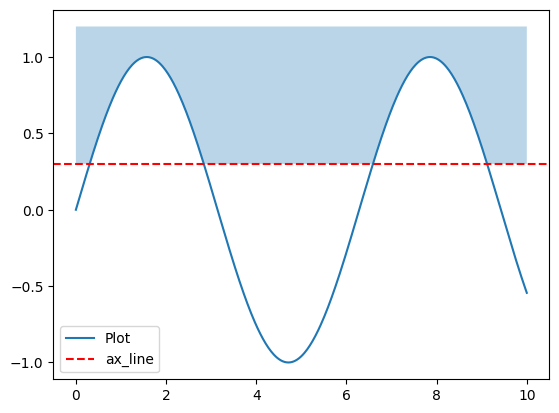

In [4]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 500)

y_plot = np.sin(x)
ax_line = 0.3
y_fill = np.ones_like(x) * 1.2   # obere Begrenzung (z. B. Achsenoberkante)

fig, ax = plt.subplots()

# Plot
ax.plot(x, y_plot, label="Plot")
ax.axhline(ax_line, color="red", linestyle="--", label="ax_line")

# Einfärbung nur oberhalb von Plot UND ax_line
ax.fill_between(
    x,
    np.maximum(y_plot, ax_line),  # untere Grenze
    y_fill,                        # obere Grenze
    where=(y_fill > np.maximum(y_plot, ax_line)),
    alpha=0.3
)
print(type(y_plot))
print(type(ax_line))
ax.legend()
plt.show()